# **Linear Regression using Pytorch from scratch**

We will start with Numpy and then look at Pytorch

In [ ]:
import numpy as np

In [ ]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)

# Below equation is y = a + bx + noise where a = 1 and b = 2
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
x_train[:5], y_train[:5]

(array([[0.77127035],
        [0.06355835],
        [0.86310343],
        [0.02541913],
        [0.73199394]]), array([[2.47453822],
        [1.19277206],
        [2.9127843 ],
        [1.07850733],
        [2.47316396]]))

In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


Above code cells are to create the data as Numpy arrays. This is the same data that we created in LR model with Numpy. 
https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy 

We will convert the numpy arrays into Tensors in below cells so that we can use them with Pytorch.



In [ ]:
# Installing torchviz since it was not pre-installed on this GPU.
!pip install torchviz

     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=28d2000b9a7b828cc19400716528eb1a55cf9aadeea8860bf65c75189b590f79
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:
#Library Imports
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

#Setting the Device to CPU or GPU based on the availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
print(device) #Since we are using GPU here, devide shows as cuda. Otherwise it would show as cpu.

cuda


In [ ]:
# In https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy the data was in Numpy arrays. 
# For using with Pytorch, we need to have PyTorch's Tensors
# 
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

In [ ]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


We can see x_train_tensor is now a Tensor and .type() shows that it is a Tensor which is on GPU and is of Float datatype

In [ ]:
# Initializing a and b to random values
# This is similar to what we did in Numpy.
# We set REQUIRES_GRAD = TRUE because we want to calculate partial derivatives or gradients on these parameters
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)


tensor([-0.0125], requires_grad=True) tensor([-0.2016], requires_grad=True)


This looks good. These are Tensors and can be used with Pytorch. Is it ??

In [ ]:
a.type()

'torch.FloatTensor'

This is a Float Tensor but resides on CPU. To use GPU, we need to push it to GPU. 

In [ ]:
a = a.to(device)
b = b.to(device)

In [ ]:
a.type()

'torch.cuda.FloatTensor'

In [ ]:
b.type()

'torch.cuda.FloatTensor'

Okay. Now we have pushed them to GPU.

In [ ]:
a, b

(tensor([-0.0125], device='cuda:0', grad_fn=<CopyBackwards>),
 tensor([-0.2016], device='cuda:0', grad_fn=<CopyBackwards>))

What happened to requires_grad=True !? Looks like we lost it when we moved to GPU. 
So, this is not the right approach to create Tensors on GPU which require gradient descent

In [ ]:
# We can create regular float tensors and send them to the device.
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)


In [ ]:
# and therafter set them as requiring gradients i.e. requires_grad = True
a.requires_grad_()
b.requires_grad_()
a, b

(tensor([-0.4192], device='cuda:0', requires_grad=True),
 tensor([-0.1465], device='cuda:0', requires_grad=True))

# However the best way is to create the Tensors right away on GPU instead of all this moving around. 
# The output of this and above cells is essentially the same, but this is a best practice and straightforward. 

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

Okay.. Now we have a and b Tensors on GPU.. 
What next ? Start Forward Pass -> calculate Loss -> calculate gradients -> do backward pass and repeat it for number of epochs ??

In [ ]:
lr = 1e-1
n_epochs = 1000

# set a learning rate and number of epochs


In this next section we will run a for loop and calculate the predictions, error and MSE loss similar to what we did before in 
LR with Numpy exercise. 

However we will not calculate the gradient by hand. Rather we will use Pytorch's autograd function and its capabilities. 
Autograd is PyTorch’s automatic differentiation package and it will take care of calculating Partial Derivatives,
Chain rule of derivatives where we multiply different partial derivatives to get a final derivative and so on.

It will also keep accumulating the gradient for each change of that object. We have set a and b to requires_grad=True.
Therefore gradients will be calculated for them by Pytorch. 

In [ ]:
for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # Lets print a and b before the backward pass.
    print("epoch number =", epoch)
    print("a and b before backward pass" , a,b)

    # We will not do this now like we did in Numpy notebook 
    # - https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We will tell PyTorch to do the back progagation to the beginning from the specified loss which is at the end. 
    loss.backward()
    # Let's check the computed gradients...
    type(a.grad)
    print("a's gradient = " , a.grad) 
    print("b's gradient = " , b.grad)
    
    # Let's try to update the parameters with the formula we know - parameters = parameters - learning rate* gradient(parameters wrto Loss function)
  
    a = a - lr * a.grad
    b = b - lr * b.grad
    print("a and b after backward pass" , a,b)



epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-3.3881], device='cuda:0')
b's gradient =  tensor([-1.9439], device='cuda:0')
a and b after backward pass tensor([0.5328], device='cuda:0', grad_fn=<SubBackward0>) tensor([0.3335], device='cuda:0', grad_fn=<SubBackward0>)
epoch number = 1
a and b before backward pass tensor([0.5328], device='cuda:0', grad_fn=<SubBackward0>) tensor([0.3335], device='cuda:0', grad_fn=<SubBackward0>)
a's gradient =  None
b's gradient =  None


TypeError: ignored

Well.. It did not work. a.grad and b.grad became None after epoch 0 and the parameter update statement fails for epoch 1. 
What happened ?

epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)

See what happened after backward pass during epoch 0. The requires_grad=True vanished again after a and b were reassigned new values. 
This is similar to what happened before when we moved a and b from CPU to GPU. 
See here. Link to the cell - https://colab.research.google.com/drive/1OBbzaMpf33M8Fc-Z1yY0jqFKLScvYgco#scrollTo=mp9lvYynHw3U

a and b after backward pass tensor([0.5328], device='cuda:0', grad_fn=<SubBackward0>) tensor([0.3335], device='cuda:0', grad_fn=<SubBackward0>)

In [ ]:
print(a, b)

tensor([0.5328], device='cuda:0', grad_fn=<SubBackward0>) tensor([0.3335], device='cuda:0', grad_fn=<SubBackward0>)


In [ ]:
# Now a and b are messed up. So, I initialize them again. 

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [ ]:
print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


In [ ]:
# Lets try something else

In [ ]:
for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # Lets print a and b before the backward pass.
    print("epoch number =", epoch)
    print("a and b before backward pass" , a,b)

    # We will not do this now like we did in Numpy notebook 
    # - https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We will tell PyTorch to do the back progagation to the beginning from the specified loss which is at the end. 
    loss.backward()
    # Let's check the computed gradients...
    type(a.grad)
    print("a's gradient = " , a.grad) 
    print("b's gradient = " , b.grad)
    
    # Let's try to update the parameters with the formula we know - parameters = parameters - learning rate* gradient(parameters wrto Loss function)
  
    a-= lr * a.grad
    b.sub_(lr * b.grad)
    print("a and b after backward pass" , a,b)

epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-3.3881], device='cuda:0')
b's gradient =  tensor([-1.9439], device='cuda:0')


RuntimeError: ignored

We used the inplace value substitution instead of assigning to a and b. There are two ways to do it and both are shown above i.e. a-= or b.sub_

 It does not even finish epoch 0. It fails when assigning the value. This is because of Pytorch's Dynamic Computational Graph
Basically since required_grad is set to True for a and b, pytorch is calculating gradients and storing them for each change to a and b. 

Since we are trying to change the same object using its own value, it throws an error. 
We need to basically somehow tell Pytorch not to calculate gradient for a and b when we are doing this parameter update step. 

In [ ]:
# Now a and b are messed up again. So, I initialize them yet again. 

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [ ]:
print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


# Lets try something else now. We will tell Pytorch not to compute gradients when we are doing the parameter update. 

In [ ]:
for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # Lets print a and b before the backward pass for certain epochs only.
    if(epoch%100==0):
      print("epoch number =", epoch)
      print("a and b before backward pass" , a,b)

    # We will not do this now like we did in Numpy notebook 
    # - https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We will tell PyTorch to do the back progagation to the beginning from the specified loss which is at the end. 
    loss.backward()
    # Let's check the computed gradients...
    # Lets print the gradients for certain epochs only.
    if(epoch%100==0):
      print("a's gradient = " , a.grad) 
      print("b's gradient = " , b.grad)
    
    # Let's try to update the parameters with the formula we know - parameters = parameters - learning rate* gradient(parameters wrto Loss function)
    # We are telling Pytorch not to calculate gradients for steps within the "with"
    # torch.no_grad() allows us to perform regular Python operations on tensors, independent of PyTorch’s Dynamic computation graph.
    with torch.no_grad():
      a-= lr * a.grad
      b.sub_(lr * b.grad)
    # Lets print a and b after the backward pass for certain epochs only.
    if(epoch%100==0):
      print("a and b after backward pass" , a,b)

epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-3.3881], device='cuda:0')
b's gradient =  tensor([-1.9439], device='cuda:0')
a and b after backward pass tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
epoch number = 100
a and b before backward pass tensor([0.2229], device='cuda:0', requires_grad=True) tensor([0.1810], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-4.1505], device='cuda:0')
b's gradient =  tensor([-1.8718], device='cuda:0')
a and b after backward pass tensor([0.6379], device='cuda:0', requires_grad=True) tensor([0.3682], device='cuda:0', requires_grad=True)
epoch number = 200
a and b before backward pass tensor([0.2240], device='cuda:0', requires_grad=True) tensor([0.3068], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-4.8702], device='cuda:0')
b's gra

This ran successfully. But the values of a and b are wrong at 900th epoch and is getting worse. 
Our results from numpy exercise were very close to actual values after 1000 epochs. 
This is another issue due to Pytorch's computational graph. It keeps accumulating the gradient values.
We need to tell it to let it go after an epoch.

In [ ]:
# Now a and b are messed up again. So, I initialize them yet again. 

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [ ]:
print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


# Lets try something else now. We will reset the grads to zero after each epoch

In [ ]:
for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # Lets print a and b before the backward pass for certain epochs only.
    if(epoch%100==0):
      print("epoch number =", epoch)
      print("a and b before backward pass" , a,b)

    # We will not do this now like we did in Numpy notebook 
    # - https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We will tell PyTorch to do the back progagation to the beginning from the specified loss which is at the end. 
    loss.backward()
    # Let's check the computed gradients...
    # Lets print the gradients for certain epochs only.
    if(epoch%100==0):
        print("a's gradient = " , a.grad) 
        print("b's gradient = " , b.grad)
    
    # Let's try to update the parameters with the formula we know - parameters = parameters - learning rate* gradient(parameters wrto Loss function)
    # We are telling Pytorch not to calculate gradients for steps within the "with"
    with torch.no_grad():
        a-= lr * a.grad
        b.sub_(lr * b.grad)
    
    # Lets print a and b after the backward pass for certain epochs only.
    if(epoch%100==0):
        print("a and b after backward pass" , a,b)

    # We reset it to zero after each epoch
    a.grad.zero_()
    b.grad.zero_()
    # Lets print a and b after the backward pass and after reset to zero for certain epochs only.
    if(epoch%100==0):
        print("a and b after backward pass after resetting grad to zero" , a,b)

epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-3.3881], device='cuda:0')
b's gradient =  tensor([-1.9439], device='cuda:0')
a and b after backward pass tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
a and b after backward pass after resetting grad to zero tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
epoch number = 100
a and b before backward pass tensor([1.1479], device='cuda:0', requires_grad=True) tensor([1.7257], device='cuda:0', requires_grad=True)
a's gradient =  tensor([0.0188], device='cuda:0')
b's gradient =  tensor([-0.0367], device='cuda:0')
a and b after backward pass tensor([1.1460], device='cuda:0', requires_grad=True) tensor([1.7294], device='cuda:0', requires_grad=True)
a and b after backward pass after resetting grad t

This looks good. Compare the gradient values for each epoch for this loop vs the one before. 
The gradients keep improving here and the values of a and b keep coming closer to actual values.

In [ ]:
a, b

(tensor([1.0235], device='cuda:0', requires_grad=True),
 tensor([1.9690], device='cuda:0', requires_grad=True))

The predicted values are close to actual values. 

# Dynamic Computational Graph

Now a and b are not messed up. But I am resetting them to check the Dynamic Computational Graph

In [ ]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

(tensor([0.1940], device='cuda:0', requires_grad=True),
 tensor([0.1391], device='cuda:0', requires_grad=True))

In [ ]:
print(a, b)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


Lets manually calculate the prediction, error and loss for epoch 0

In [ ]:
yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

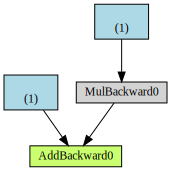

In [ ]:
make_dot(yhat)

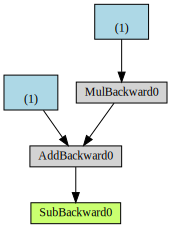

In [ ]:
make_dot(error)

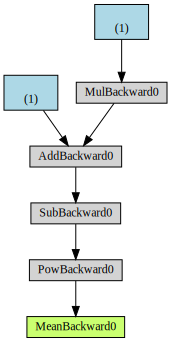

In [ ]:
make_dot(loss)

**Blue box** - This is for the tensors that are used as parameters i.e. a and b and we have set requires_grad = True for them.

**Grey box** - This indicates some operation that involves a gradient-computing (like a or b) tensor and/or its dependencies.

**Green box** - This indicates the starting point of the gradient calculation for the backward pass. This and grey boxes are the places where gradients are calculated. 

Note that there are no special mentions for x in the forward pass of the graph because it is **not** a tensor for which we compute gradients. 

# Lets torch it more.. We used pytorch to calculate the gradients before using the .backward function.
# Lets use pytorch now to do the parameters = parameters - learning rate * gradients which is updating the weights or parameters.

Generally we do not update the weights/parameters manually since there will be a large number of them. We have to use the optim class of Pytorch.

In below code, we are basically using the optim code to update parameters through SGD (in this case since entire batch of data is used it works as Batch Gradient Descent). In real life, this would actually work as a Mini Batch Gradient Descent since mini batches of data are sent at a time in each epoch.

In [ ]:
#Resetting a and b again

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

lr = 1e-1
n_epochs = 1000

# Define a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()
    
    # Lets print a and b before the backward pass for certain epochs only.
    if(epoch%100==0):
      print("epoch number =", epoch)
      print("a and b before backward pass" , a,b)

    # We will not do this now like we did in Numpy notebook 
    # - https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We will tell PyTorch to do the back progagation to the beginning from the specified loss which is at the end. 
    loss.backward()
    # Let's check the computed gradients...
    # Lets print the gradients for certain epochs only.
    if(epoch%100==0):
        print("a's gradient = " , a.grad) 
        print("b's gradient = " , b.grad)
    
    # Let's try to update the parameters with the formula we know - parameters = parameters - learning rate* gradient(parameters wrto Loss function)
    # We are telling Pytorch not to calculate gradients for steps within the "with"
    #with torch.no_grad():
    #    a-= lr * a.grad
    #   b.sub_(lr * b.grad)

    # We will use optimizer to update the parameters. 
    optimizer.step()
    
    # Lets print a and b after the backward pass for certain epochs only.
    if(epoch%100==0):
        print("a and b after backward pass" , a,b)

    # We reset it to zero after each epoch
    #a.grad.zero_()
    #b.grad.zero_()

    # We will use optimizer to reset the gradients to zero. 

    optimizer.zero_grad()

    # Lets print a and b after the backward pass and after reset to zero for certain epochs only.
    if(epoch%100==0):
        print("a and b after backward pass after resetting grad to zero" , a,b)


epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-3.3881], device='cuda:0')
b's gradient =  tensor([-1.9439], device='cuda:0')
a and b after backward pass tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
a and b after backward pass after resetting grad to zero tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
epoch number = 100
a and b before backward pass tensor([1.1479], device='cuda:0', requires_grad=True) tensor([1.7257], device='cuda:0', requires_grad=True)
a's gradient =  tensor([0.0188], device='cuda:0')
b's gradient =  tensor([-0.0367], device='cuda:0')
a and b after backward pass tensor([1.1460], device='cuda:0', requires_grad=True) tensor([1.7294], device='cuda:0', requires_grad=True)
a and b after backward pass after resetting grad t

The output looks good and we used Pytorch's optim to update parameters and also reset the gradient after each epoch. Good going..!

# What else is our handwritten code ? Prediction expression, Error and Loss calculations.

Lets work on Loss and Error first. 

Pytorch has many Loss functions and we have to use the appropriate ones based on the need. 

In this example, we are using MSE and we can use nn.MSELoss class for creating the loss function. 


In [ ]:
#Resetting a and b again

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a, b

lr = 1e-1
n_epochs = 1000

# Define a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)
loss_func = nn.MSELoss(reduction='mean')
# reduction = 'mean' basically says you aggregate the losses by mean. 
# reduction can also be sum in which case it is SSE. Sum Squared Error.

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    # error = y_train_tensor - yhat
    #loss = (error ** 2).mean()
    # We commented the loss calculation and error calculation since 
    # both will be taken care of by loss_func defined above. 
    loss = loss_func(y_train_tensor, yhat)
    
    # Lets print a and b before the backward pass for certain epochs only.
    if(epoch%100==0):
      print("epoch number =", epoch)
      print("a and b before backward pass" , a,b)

    # We will not do this now like we did in Numpy notebook 
    # - https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We will tell PyTorch to do the back progagation to the beginning from the specified loss which is at the end. 
    loss.backward()
    # Let's check the computed gradients...
    # Lets print the gradients for certain epochs only.
    if(epoch%100==0):
        print("a's gradient = " , a.grad) 
        print("b's gradient = " , b.grad)
    
    # Let's try to update the parameters with the formula we know - parameters = parameters - learning rate* gradient(parameters wrto Loss function)
    # We are telling Pytorch not to calculate gradients for steps within the "with"
    #with torch.no_grad():
    #    a-= lr * a.grad
    #   b.sub_(lr * b.grad)

    # We will use optimizer to update the parameters. 
    optimizer.step()
    
    # Lets print a and b after the backward pass for certain epochs only.
    if(epoch%100==0):
        print("a and b after backward pass" , a,b)

    # We reset it to zero after each epoch
    #a.grad.zero_()
    #b.grad.zero_()

    # We will use optimizer to reset the gradients to zero. 

    optimizer.zero_grad()

    # Lets print a and b after the backward pass and after reset to zero for certain epochs only.
    if(epoch%100==0):
        print("a and b after backward and zeroing grad" , a,b)

epoch number = 0
a and b before backward pass tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)
a's gradient =  tensor([-3.3881], device='cuda:0')
b's gradient =  tensor([-1.9439], device='cuda:0')
a and b after backward pass tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
a and b after backward and zeroing grad tensor([0.5328], device='cuda:0', requires_grad=True) tensor([0.3335], device='cuda:0', requires_grad=True)
epoch number = 100
a and b before backward pass tensor([1.1479], device='cuda:0', requires_grad=True) tensor([1.7257], device='cuda:0', requires_grad=True)
a's gradient =  tensor([0.0188], device='cuda:0')
b's gradient =  tensor([-0.0367], device='cuda:0')
a and b after backward pass tensor([1.1460], device='cuda:0', requires_grad=True) tensor([1.7294], device='cuda:0', requires_grad=True)
a and b after backward and zeroing grad tensor([1.1460], device='cu

# Alright.. Loss calculated using Pytorch. What next ? 

#Lets tackle the remaining manually written expression. 

#***The Prediction logic or the Model*** 

For the model, we need to use the Module Class of Pytorch. We should create a new class which inherits from the Module class.

It needs to have two mandatory methods apart from any other methods as required for the problem at hand -  
__init__(self) - As the name says this is for the initialization. Setting up of the parameters. In this case of LR, we have a and b

forward(self, x) - The method which does the actual prediction logic. 

Pytorch Module class is defined such that the forward method works as the core method of the class. 

When the class is called like a function, the forward method is invoked. 



In [ ]:
# Lets define the class as mentioned earlier which inherits the nn.Module Pytorch class

class MyLRModel(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them in nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the predictions and in this case it is a + bx
        return self.a + self.b * x

In [ ]:
# The class has a and b defined. Also removing the print statements within the epochs loop. 

#Keeping the seed same as before. This has to be done before defining the model. 
torch.manual_seed(42)

# Now we can create a model and send it to the device. Model should be on the same device as the parameters.
model = MyLRModel().to(device)


# To print the values of a and b , we use state_dict() method.
print(model.state_dict())

lr = 1e-1
n_epochs = 1000

# Define a SGD optimizer to update the parameters. Note that parameters are now passed via model.parameters() and not manually.
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_func = nn.MSELoss(reduction='mean')
# reduction = 'mean' basically says you aggregate the losses by mean. 
# reduction can also be sum in which case it is SSE. Sum Squared Error.

for epoch in range(n_epochs):
    # This is to tell Pytorch that model should be in training mode at this time and not evaluation mode. 
    # The model behavior might change in different modes. 
    model.train() 

    yhat = model(x_train_tensor)

    loss = loss_func(y_train_tensor, yhat)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

# To print the values of a and b after all epochs, we use state_dict() method.
print(model.state_dict())

OrderedDict([('a', tensor([0.3367], device='cuda:0')), ('b', tensor([0.1288], device='cuda:0'))])
OrderedDict([('a', tensor([1.0235], device='cuda:0')), ('b', tensor([1.9690], device='cuda:0'))])


Output same as before. We have 5 statements in the loop. 

    yhat = model(x_train_tensor)

    loss = loss_func(y_train_tensor, yhat)

    loss.backward()

    optimizer.step()

    optimizer.zero_grad()

Can we refactor these ?


Lets refactor the training steps. Here, we just put all the code that kept repeating in the epoch loop in a method

In [ ]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to training mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_func(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step


# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_func, optimizer)
losses = []

# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)
    
# Checks model's parameters
print(model.state_dict())

OrderedDict([('a', tensor([1.0235], device='cuda:0')), ('b', tensor([1.9690], device='cuda:0'))])


In real life, data will not be so simple. 

Therefore we pass data as (features, labels) to Pytorch

features are inputs and labels are outputs. 

 For this we use the Dataset class of Pytorch. Below we see a custom Dataset class that we defined by inheriting the Pytorch's Dataset class as well as TensorDataset class of Pytorch

Any dataset returns three things, (x,y) , a way to index through x,y and length(x) 

In [ ]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)


x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])
type(train_data)



(tensor([0.7713]), tensor([2.4745]))


__main__.CustomDataset

In [ ]:
train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])
type(train_data)

(tensor([0.7713]), tensor([2.4745]))


torch.utils.data.dataset.TensorDataset

The outputs of our Custom Dataset class and TensorDataset class are the same. 
This is because we are doing exactly what the TensorDataset will do although our class will not have other bells and whistles which TensorDataset class will have.

Okay.. What next ?

In [ ]:
len(x_train_tensor) , type(x_train_tensor), len(train_data), type(train_data)

(80, torch.Tensor, 80, torch.utils.data.dataset.TensorDataset)

In [ ]:
len(x_val), type(x_val)

(20, numpy.ndarray)

In [ ]:
x_valid_tensor = torch.from_numpy(x_val).float()
y_valid_tensor = torch.from_numpy(y_val).float()

In [ ]:
valid_data = TensorDataset(x_valid_tensor, y_valid_tensor)

In [ ]:
len(x_valid_tensor), type(x_valid_tensor), len(valid_data), type(valid_data)

(20, torch.Tensor, 20, torch.utils.data.dataset.TensorDataset)

In the above cells, we created Train and Valid Datasets using Pytorch TensorDataset class

Also note that these Datasets are on cpu and not the GPU. We will get to know the reason for this once we understand Dataloaders


Before that lets try to push the dataset to GPU.. 

In [ ]:
train_data.to(device)

AttributeError: ignored

Ahh... It fails..

Lets see what these Dataloaders are. Generally data is sent to GPU and to the training loop in mini batches. Dataloader is a class which can store the dataset and allows to fetch mini batches of data via iteration. 

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

Below gives a mini batch of data from train_data dataset.

In [ ]:
next(iter(train_loader))

[tensor([[0.9507],
         [0.5427],
         [0.1409],
         [0.3745],
         [0.1987],
         [0.8948],
         [0.7722],
         [0.7852],
         [0.5248],
         [0.2809],
         [0.1159],
         [0.0740],
         [0.1849],
         [0.4561],
         [0.7608],
         [0.1560]]), tensor([[2.8715],
         [2.2161],
         [1.1211],
         [1.7578],
         [1.2654],
         [2.7393],
         [2.4208],
         [2.5283],
         [2.0167],
         [1.5846],
         [1.1603],
         [1.1713],
         [1.5888],
         [1.7706],
         [2.4970],
         [1.2901]])]

In [ ]:
len(next(iter(train_loader.batch_sampler)))

16

Above cell show the size of one iteration of the Dataloader. It is 16 i.e the size we specified. 

In [ ]:
train_loader.batch_size

16

In [ ]:
train_loader.dataset[0]

(tensor([0.7713]), tensor([2.4745]))

In [ ]:
train_data[0]

(tensor([0.7713]), tensor([2.4745]))

Above cells show the value of the index 0 in dataset from within the Loader as well as direclty from the dataset

In [ ]:
losses = []
train_step = make_train_step(model, loss_func, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        # The dataset, dataloader and its mini-batches all resides in the CPU for now.
        # Lets send those mini-batches to the GPU in below steps
        # Model is already in GPU
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
print(model.state_dict())

OrderedDict([('a', tensor([1.0242], device='cuda:0')), ('b', tensor([1.9682], device='cuda:0'))])


Well, we added an extra loop and it took slightly higher time to finish than our previous trials.

However, this is required in real life, because the data will be huge and cannot be loaded into GPU at once. 

If you remember, we split the data 80:20 as train and valid in the beginning of this notebook. 

However, we generally use Pytorch's feature to split the data into train and valid (random split) or we have data split as training and validation data using some functional rule beforehand.

We have trained the model, but we need to validate it. 

For that we use the validation dataloader-> dataset-> data

In [ ]:
valid_loader = DataLoader(dataset=valid_data, batch_size=16, shuffle=True)

In [ ]:
losses = []
val_losses = []
train_step = make_train_step(model, loss_func, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    with torch.no_grad():
        for x_val, y_val in valid_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            
            model.eval()

            yhat = model(x_val)
            val_loss = loss_func(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('a', tensor([1.0290], device='cuda:0')), ('b', tensor([1.9720], device='cuda:0'))])


In [ ]:
len(val_losses)

2000

2000. How did this number come ?
 valid data length (see first few lines of notebook) which is 20 / 16 batch size = 2 (approx)

 2 * number of epochs(1000) = 2000

In [ ]:
val_losses[1990:]

[0.00672027375549078,
 0.017072057351469994,
 0.010100197046995163,
 0.004003560170531273,
 0.008860822767019272,
 0.007289723493158817,
 0.007129967212677002,
 0.015293894335627556,
 0.0099174864590168,
 0.00720137357711792]

In [ ]:
len(losses)

5000

5000. How did this number come ?
 train data length (see first few lines of notebook) which is 80 / 16 batch size = 5

5 * number of epochs(1000) = 5000

In [ ]:
losses[4990:]

[0.01098373532295227,
 0.007446237839758396,
 0.004498552531003952,
 0.011742398142814636,
 0.006587368436157703,
 0.006659486331045628,
 0.008902094326913357,
 0.006174780428409576,
 0.010141816921532154,
 0.008895618841052055]

As you can see the final losses of train and valid data, training loss is slightly higher than validation loss. 

OrderedDict([('a', tensor([1.0290], device='cuda:0')), ('b', tensor([1.9720], device='cuda:0'))])

# This is the final prediction of the model which is pretty accurate, slightly more accurate than our numpy model -  https://github.com/manjunathrgithub/Simple-LR-Model-with-Numpy/blob/master/LR_Using_Numpy.ipynb